In [1]:
from session.PPOsession import PPOSession
from agent.train_and_test.train_test_callback import TrainTestCallback
from domain_randomization.callbacks import UDRCallback, UDR, GDRCallback, NDR

In [4]:
ppos1 = PPOSession('CustomHopper-source-v0', "outputs/ppo-basic", verbose=1)
best_ppo_hp = {'learning_rate': 0.0007945280477054489, 'gamma': 0.993, 'clip_range': 0.27, 'n_steps': 2048, 'batch_size': 64}

ppos1.load_agent(**best_ppo_hp)
N_episode = 4000
ppos1.load_callback(TrainTestCallback, max_episode=N_episode, test_every=200, test_env_path = 'CustomHopper-target-v0')
ppos1.train(N_episode*500)

Successful creation of the session, first step is step=1.


/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


 199 episodes completed.

/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


 4000 episodes completed.

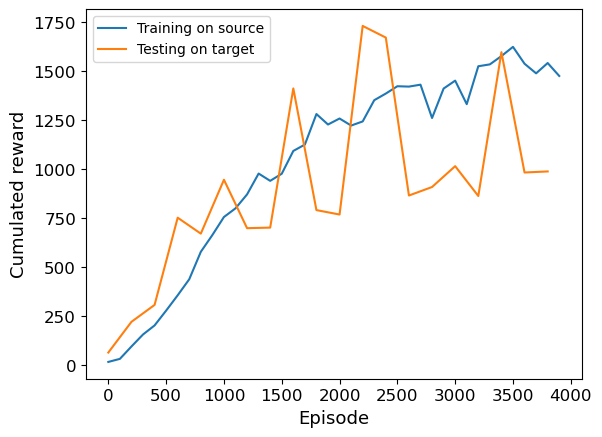

In [15]:
import matplotlib.pyplot as plt
from rolling_avg import rolling_avg
import json
n_avg = 100
fig, ax = plt.subplots(1,1)
dir = "outputs/ppo-basic/step_1_train/"
with open(dir + 'train_rewards.json') as f:
    rewards = json.load(f)
averaged_rewards = rolling_avg(rewards, n_avg)
ax.plot(range(0, len(averaged_rewards)*n_avg, n_avg), averaged_rewards, label="Training on source")
with open(dir + 'test_rewards.json') as f:
    rewards = json.load(f)
ax.plot(range(0, len(averaged_rewards)*n_avg, 200), rewards, label="Testing on target")
ax.set_xlabel("Episode", fontsize=13)
ax.set_ylabel("Cumulated reward", fontsize=13)
ax.tick_params(axis='both', labelsize=12)
ax.legend()

In [2]:
ppos1 = PPOSession(UDR, "outputs/ppo-udr", verbose=1)
best_ppo_hp = {'learning_rate': 0.0007945280477054489, 'gamma': 0.993, 'clip_range': 0.27, 'n_steps': 2048, 'batch_size': 64}
ppos1.load_agent(**best_ppo_hp)
N_episode = 4000
ppos1.load_callback(TrainTestCallback, max_episode=N_episode, test_every=200, test_env_path = 'CustomHopper-target-v0')
ppos1.load_callback(UDRCallback)
ppos1.train(N_episode*500)

Successful creation of the session, first step is step=4.


/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


 7 episodes completed.

/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.modify_parameters to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.modify_parameters` for environment variables or `env.get_wrapper_attr('modify_parameters')` that will search the reminding wrappers.
  logger.warn(


 199 episodes completed.

/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


 4000 episodes completed.

In [2]:
ppos1 = PPOSession(NDR, "outputs/ppo-gdr", verbose=1)
best_ppo_hp = {'learning_rate': 0.0007945280477054489, 'gamma': 0.993, 'clip_range': 0.27, 'n_steps': 2048, 'batch_size': 64}
ppos1.load_agent(**best_ppo_hp)
N_episode = 4000
ppos1.load_callback(TrainTestCallback, max_episode=N_episode, test_every=200, test_env_path = 'CustomHopper-target-v0')
ppos1.load_callback(GDRCallback)
ppos1.train(N_episode*500)

Successful creation of the session, first step is step=2.


/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


 11 episodes completed.

/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.modify_parameters to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.modify_parameters` for environment variables or `env.get_wrapper_attr('modify_parameters')` that will search the reminding wrappers.
  logger.warn(


 199 episodes completed.

/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


 4000 episodes completed.

In [16]:
from domain_randomization import ADRCallback
from env import * # To register the ADR env.
from session.PPOsession import PPOSession
ppos2 = PPOSession('ADRHopper-v0', "outputs/ppo-adr")
ppos2.load_agent()
ppos2.load_callback(ADRCallback, ref_env_path = 'CustomHopper-target-v0', nenvs=10)

N_episode = 3500
ppos2.train(N_episode*500)

/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_parameters to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_parameters` for environment variables or `env.get_wrapper_attr('get_parameters')` that will search the reminding wrappers.
  logger.warn(
/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.set_parameters to get variables from other wrappers is deprecated and will be removed in v1.0, to get this v

 7397 episodes completed.h


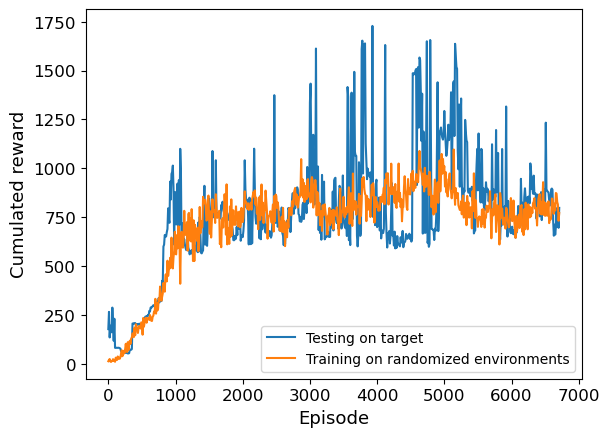

In [1]:
import matplotlib.pyplot as plt
from rolling_avg import rolling_avg
import json
n_avg = 10
fig, ax = plt.subplots(1,1)
dir = "outputs/ppo-adr/step_1_train/"
with open(dir + 'rd_rewards.json') as f:
    rd_rewards = json.load(f)
averaged_rewards = rolling_avg(rd_rewards, n_avg)

with open(dir + 'ref_rewards.json') as f:
    ref_rewards = json.load(f)
ax.plot(range(0, len(ref_rewards)*10, 10), ref_rewards, label="Testing on target")
ax.plot(range(0, len(averaged_rewards)*n_avg, n_avg), averaged_rewards, label="Training on randomized environments")


ax.set_xlabel("Episode", fontsize=13)
ax.set_ylabel("Cumulated reward", fontsize=13)
ax.tick_params(axis='both', labelsize=12)
ax.legend()

In [1]:
from session.PPOsession import PPOSession
from domain_randomization import ADRCallback
from env import *
ppos3 = PPOSession(ADR, "outputs/ppo-adr-pretrained")
from agent.train_and_test.train_test_callback import TrainTestCallback
ppos3.load_agent()
N_episode = 1500
ppos3.load_callback(TrainTestCallback, max_episode=N_episode, test_every=200, test_env_path = 'CustomHopper-target-v0')
ppos3.train(N_episode*500)
ppos3.load_callback(ADRCallback, ref_env_path = 'CustomHopper-target-v0', nenvs=10)
N_episode = 10_000
ppos3.train(500*N_episode)

/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


 199 episodes completed.

/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


 1500 episodes completed.

/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_parameters to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_parameters` for environment variables or `env.get_wrapper_attr('get_parameters')` that will search the reminding wrappers.
  logger.warn(
/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.set_parameters to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.set_parameters` for environment variables or `env.get_wrapper_attr('set_parameters')` that will search the reminding wrappers.
  logger.warn(


 16564 episodes completed.h


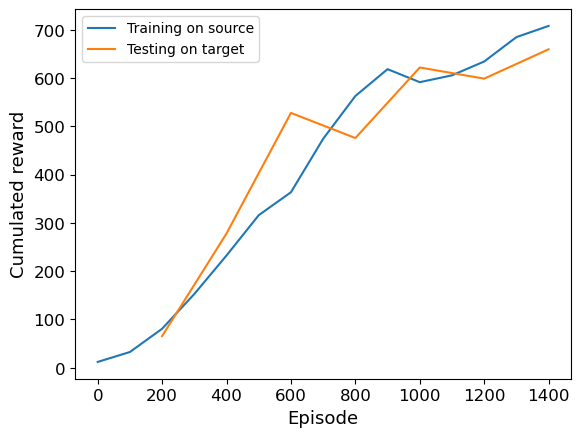

In [11]:
import matplotlib.pyplot as plt
import json
from rolling_avg import rolling_avg
n_avg = 100
fig, ax = plt.subplots(1,1)
dir = "outputs/ppo-adr-pretrained/step_6_train/"
with open(dir + 'train_rewards.json') as f:
    rewards = json.load(f)
averaged_rewards = rolling_avg(rewards, n_avg)
ax.plot(range(0, len(averaged_rewards)*n_avg, n_avg), averaged_rewards, label="Training on source")
with open(dir + 'test_rewards.json') as f:
    rewards = json.load(f)
ax.plot(range(200, len(averaged_rewards)*n_avg, 200), rewards, label="Testing on target")
ax.set_xlabel("Episode", fontsize=13)
ax.set_ylabel("Cumulated reward", fontsize=13)
ax.tick_params(axis='both', labelsize=12)
ax.legend()

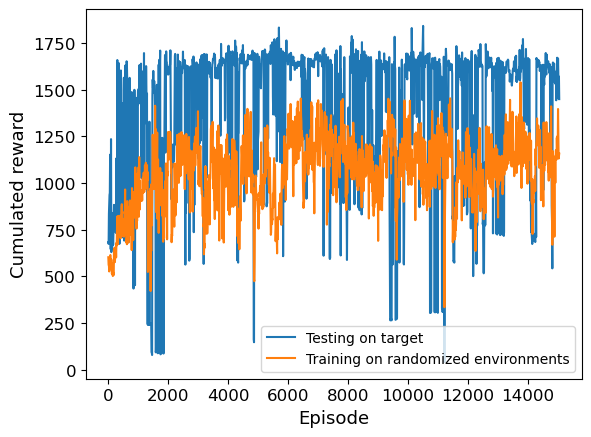

In [12]:
n_avg = 10
fig, ax = plt.subplots(1,1)
dir = "outputs/ppo-adr-pretrained/step_7_train/"
with open(dir + 'rd_rewards.json') as f:
    rd_rewards = json.load(f)
averaged_rewards = rolling_avg(rd_rewards, n_avg)

with open(dir + 'ref_rewards.json') as f:
    ref_rewards = json.load(f)
ax.plot(range(0, len(ref_rewards)*10, 10), ref_rewards, label="Testing on target")
ax.plot(range(0, len(averaged_rewards)*n_avg, n_avg), averaged_rewards, label="Training on randomized environments")


ax.set_xlabel("Episode", fontsize=13)
ax.set_ylabel("Cumulated reward", fontsize=13)
ax.tick_params(axis='both', labelsize=12)
ax.legend()

2-4-6 pretraining on source
3-5-7 ADR

TODO :Plot them all with different markers
TODO :  UDR and GDR
TODO: HP PPO